In [2]:
# Importing libraries.
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns 

import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [3]:
# Load dataset and add header names.
url = 'https://raw.githubusercontent.com/Karmen-Tee/Breast-Cancer/main/breast-cancer-wisconsin.data'

df=pd.read_csv(url,header=None,names=('ID','Clump_thickness','Uniformity_size','Uniformity_shape','Marginal_adhesion','Single_epithelial_cell_size','Bare_nuclei','Bland_chromatin','Normal_nucleoli','mitoses','class'))

In [4]:
df.head()

,ID,Clump_thickness,Uniformity_size,Uniformity_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [5]:
df.shape

(699, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   ID                           699 non-null    int64 
 1   Clump_thickness              699 non-null    int64 
 2   Uniformity_size              699 non-null    int64 
 3   Uniformity_shape             699 non-null    int64 
 4   Marginal_adhesion            699 non-null    int64 
 5   Single_epithelial_cell_size  699 non-null    int64 
 6   Bare_nuclei                  699 non-null    object
 7   Bland_chromatin              699 non-null    int64 
 8   Normal_nucleoli              699 non-null    int64 
 9   mitoses                      699 non-null    int64 
 10  class                        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [7]:
df['Bare_nuclei'] = pd.to_numeric(df['Bare_nuclei'],errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           699 non-null    int64  
 1   Clump_thickness              699 non-null    int64  
 2   Uniformity_size              699 non-null    int64  
 3   Uniformity_shape             699 non-null    int64  
 4   Marginal_adhesion            699 non-null    int64  
 5   Single_epithelial_cell_size  699 non-null    int64  
 6   Bare_nuclei                  683 non-null    float64
 7   Bland_chromatin              699 non-null    int64  
 8   Normal_nucleoli              699 non-null    int64  
 9   mitoses                      699 non-null    int64  
 10  class                        699 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 60.2 KB


# Exploratory Data Analysis

In [8]:
# Compute and view summary statistics for numerical values.
# Transpose for better view.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,699.0,1.071704e+06,617095.729819,61634.0,870688.5,1171710.0,1238298.0,13454352.0
Clump_thickness,699.0,4.417740e+00,2.815741,1.0,2.0,4.0,6.0,10.0
Uniformity_size,699.0,3.134478e+00,3.051459,1.0,1.0,1.0,5.0,10.0
Uniformity_shape,699.0,3.207439e+00,2.971913,1.0,1.0,1.0,5.0,10.0
Marginal_adhesion,699.0,2.806867e+00,2.855379,1.0,1.0,1.0,4.0,10.0
Single_epithelial_cell_size,699.0,3.216023e+00,2.214300,1.0,2.0,2.0,4.0,10.0
Bare_nuclei,683.0,3.544656e+00,3.643857,1.0,1.0,1.0,6.0,10.0
Bland_chromatin,699.0,3.437768e+00,2.438364,1.0,2.0,3.0,5.0,10.0
Normal_nucleoli,699.0,2.866953e+00,3.053634,1.0,1.0,1.0,4.0,10.0
mitoses,699.0,1.589413e+00,1.715078,1.0,1.0,1.0,1.0,10.0


In [ ]:
# Class distribution
df['class'].value_counts()

2    458
4    241
Name: class, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


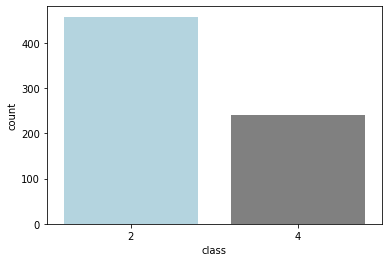

In [ ]:
sns.countplot('class', data = df , palette = ['lightblue','gray'])

In [ ]:
df.groupby('class').mean()

,ID,Clump_thickness,Uniformity_size,Uniformity_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,mitoses
class,,,,,,,,,,
2,1.107591e+06,2.956332,1.325328,1.443231,1.364629,2.120087,1.346847,2.100437,1.290393,1.063319
4,1.003505e+06,7.195021,6.572614,6.560166,5.547718,5.298755,7.627615,5.979253,5.863071,2.589212


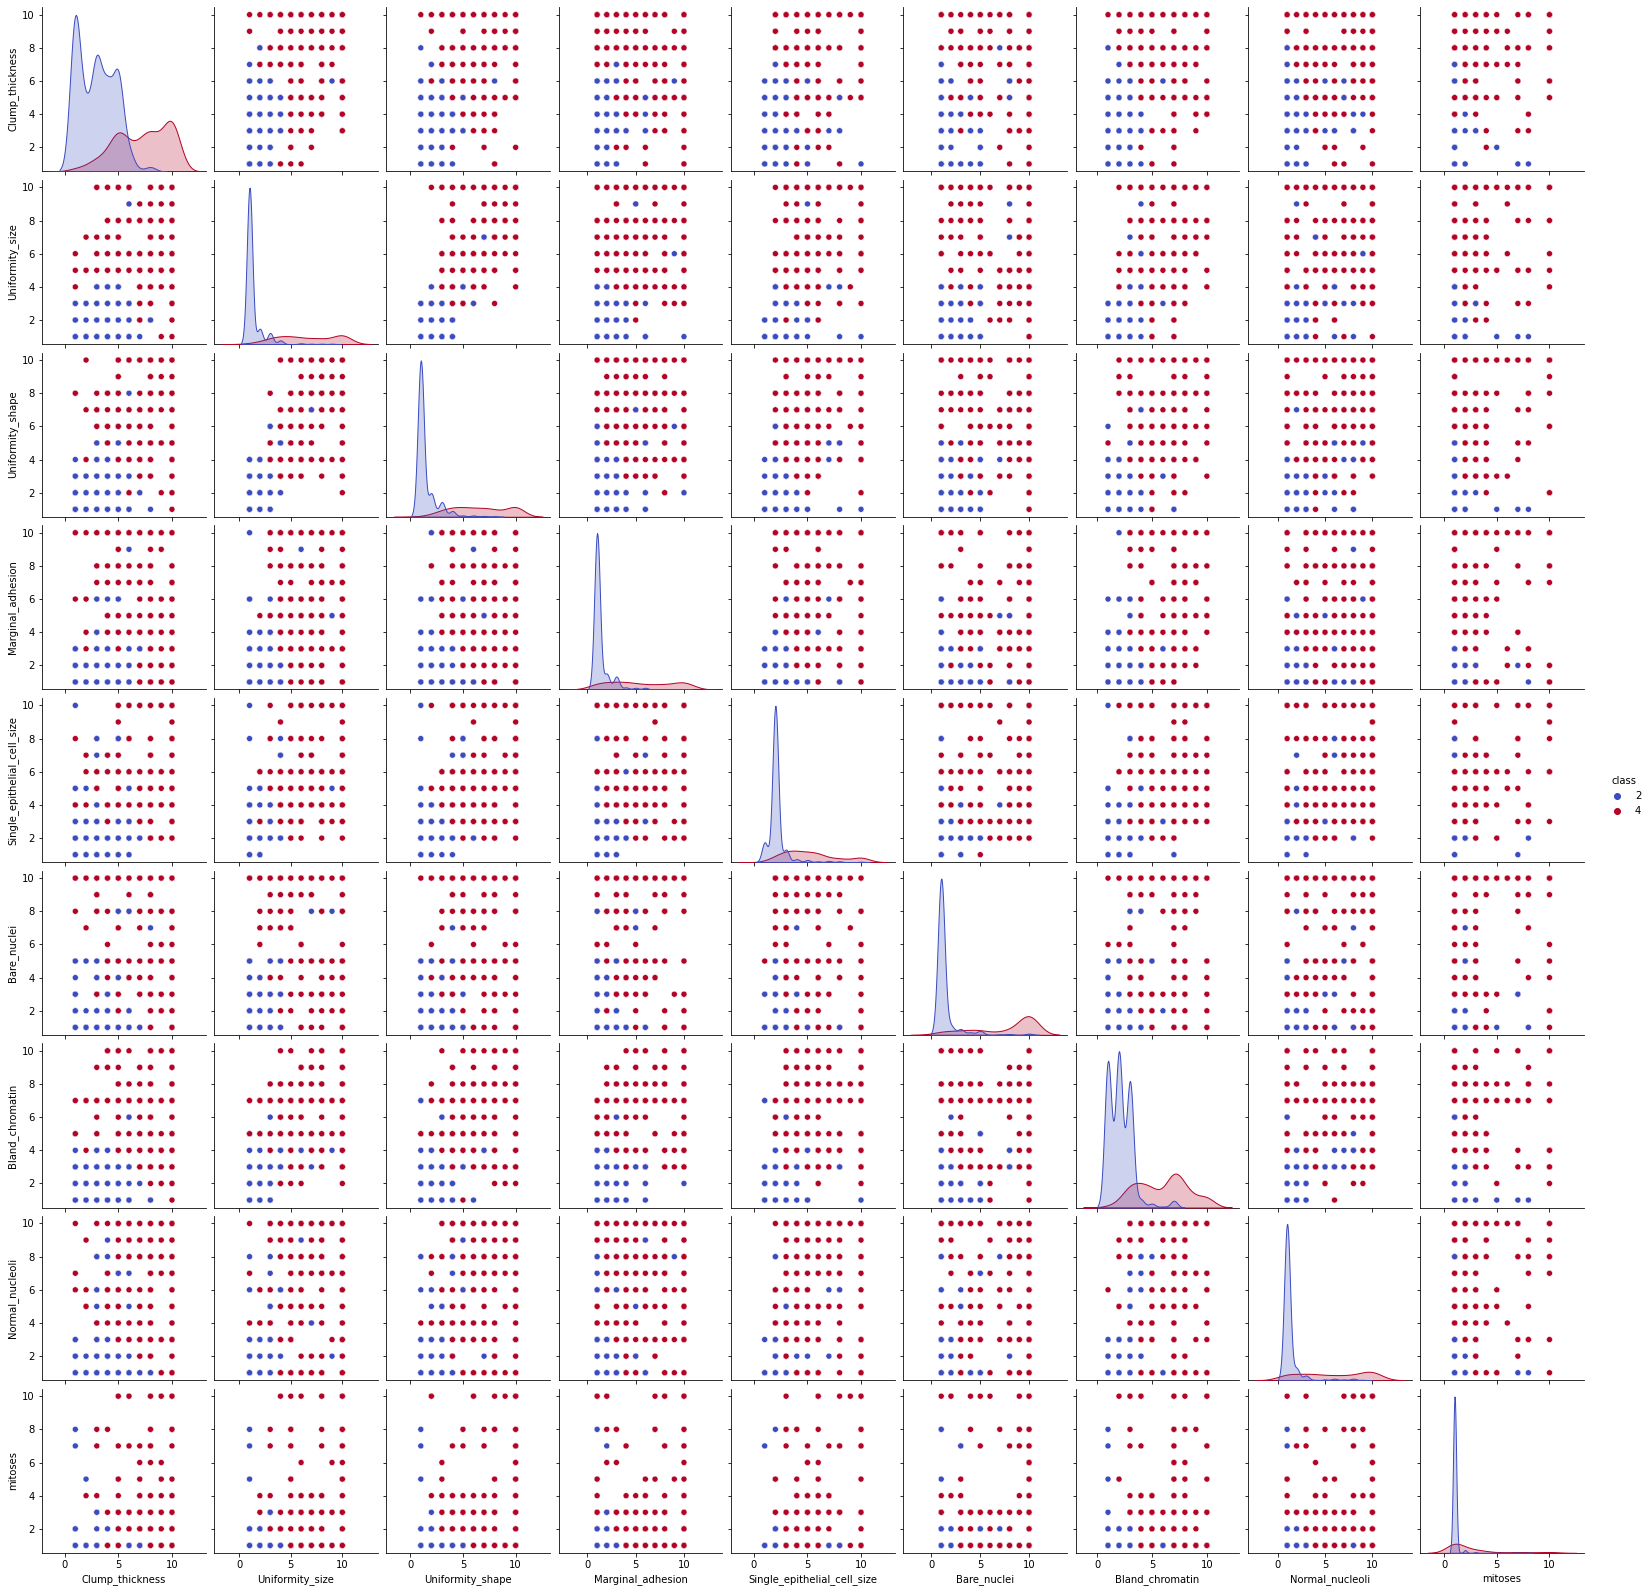

In [ ]:
# Explore relationship and distribution.
attribute = ['Clump_thickness','Uniformity_size','Uniformity_shape','Marginal_adhesion','Single_epithelial_cell_size','Bare_nuclei','Bland_chromatin','Normal_nucleoli','mitoses','class']
sns.pairplot(df[attribute], hue = 'class', palette='coolwarm')

#Correlation Matrix

In [ ]:
# Correlations between features.
correlations=df.corr()
correlations

,ID,Clump_thickness,Uniformity_size,Uniformity_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,mitoses,class
ID,1.000000,-0.055308,-0.041603,-0.041576,-0.064878,-0.045528,-0.099248,-0.060051,-0.052072,-0.034901,-0.080226
Clump_thickness,-0.055308,1.000000,0.644913,0.654589,0.486356,0.521816,0.593091,0.558428,0.535835,0.350034,0.716001
Uniformity_size,-0.041603,0.644913,1.000000,0.906882,0.705582,0.751799,0.691709,0.755721,0.722865,0.458693,0.817904
Uniformity_shape,-0.041576,0.654589,0.906882,1.000000,0.683079,0.719668,0.713878,0.735948,0.719446,0.438911,0.818934
Marginal_adhesion,-0.064878,0.486356,0.705582,0.683079,1.000000,0.599599,0.670648,0.666715,0.603352,0.417633,0.696800
Single_epithelial_cell_size,-0.045528,0.521816,0.751799,0.719668,0.599599,1.000000,0.585716,0.616102,0.628881,0.479101,0.682785
Bare_nuclei,-0.099248,0.593091,0.691709,0.713878,0.670648,0.585716,1.000000,0.680615,0.584280,0.339210,0.822696
Bland_chromatin,-0.060051,0.558428,0.755721,0.735948,0.666715,0.616102,0.680615,1.000000,0.665878,0.344169,0.756616
Normal_nucleoli,-0.052072,0.535835,0.722865,0.719446,0.603352,0.628881,0.584280,0.665878,1.000000,0.428336,0.712244
mitoses,-0.034901,0.350034,0.458693,0.438911,0.417633,0.479101,0.339210,0.344169,0.428336,1.000000,0.423170


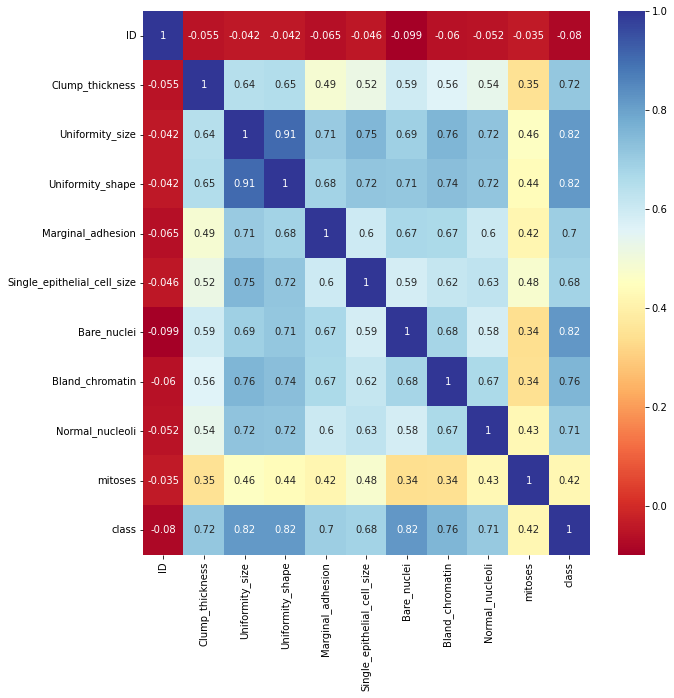

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap='RdYlBu')
plt.show()

In [ ]:
corr=df.corr()
corr['class'].sort_values(ascending = False)

class                          1.000000
Bare_nuclei                    0.822696
Uniformity_shape               0.818934
Uniformity_size                0.817904
Bland_chromatin                0.756616
Clump_thickness                0.716001
Normal_nucleoli                0.712244
Marginal_adhesion              0.696800
Single_epithelial_cell_size    0.682785
mitoses                        0.423170
ID                            -0.080226
Name: class, dtype: float64

# Data cleaning


In [ ]:
# Drop the ID number. 
df=df.drop(['ID'],axis=1)

In [ ]:
# Check missing values.
df.isnull().sum()

Clump_thickness                 0
Uniformity_size                 0
Uniformity_shape                0
Marginal_adhesion               0
Single_epithelial_cell_size     0
Bare_nuclei                    16
Bland_chromatin                 0
Normal_nucleoli                 0
mitoses                         0
class                           0
dtype: int64

(Do not need this code because from the minimum value we know there's no zero value)

Replcae 0 with NaN.
df[['Clump_thickness','Uniformity_size','Uniformity_shape','Marginal_adhesion','Single_epithelial_cell_size','Bare_nuclei','Bland_chromatin','Normal_nucleoli','mitoses','class']].replace('?',np.NaN)
df.isnull().sum()

In [ ]:
!pip install impyute

In [ ]:
# Impute using knn algorithm
import sys
from impyute.imputation.cs import fast_knn

sys.setrecursionlimit(100000) 

imputed_training=fast_knn(df[['Bare_nuclei']].values,k=30)


In [ ]:

df1=pd.DataFrame(imputed_training,columns=['Bare_nuclei'])
df[['Bare_nuclei']]= df1[['Bare_nuclei']]


In [ ]:
# Check missing values after imputation.
df.isnull().sum()

Clump_thickness                0
Uniformity_size                0
Uniformity_shape               0
Marginal_adhesion              0
Single_epithelial_cell_size    0
Bare_nuclei                    0
Bland_chromatin                0
Normal_nucleoli                0
mitoses                        0
class                          0
dtype: int64

# Data Encoding

In [ ]:
# Mapping Benign as 0 and Maglinant as 1.
df['class']=df['class'].map({2:0,4:1}).astype(int)
print(df['class'].values)

[0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 1
 0 1 1 0 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 0 0 1 0 1
 1 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 1 1 1 1 1 0 1 0
 1 1 1 0 0 0 1 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0
 0 1 0 1 1 0 0 1 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 1
 0 1 1 1 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 1 1 0 1 1 1 0 0 1 0 0 1
 1 1 1 0 1 1 0 1 1 1 0 1 0 0 1 1 1 1 0 0 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 0 0
 0 1 1 1 1 1 0 1 1 1 0 1 0 1 1 0 0 0 0 0 1 0 0 1 1 1 1 1 0 1 1 0 0 1 1 0 1
 0 0 0 1 1 0 1 0 1 1 0 0 1 0 0 0 1 0 0 0 1 1 0 0 1 0 0 1 0 0 1 0 1 1 1 0 0
 1 1 0 1 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 1 1 1 1 1 1 0 0 0 0 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0
 0 0 0 0 0 1 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 1 1 0 0 0 1 1 1 0 1 0 

In [ ]:
# (Do not run code. If want to run, make sure 'Diagnosis' values are before transformation)
# Alternative 1: 
# Import library.
from sklearn import preprocessing
# Assign diagnosis to varaible y.
# y = df['class']
# Tranform non-numerical to numerical values/ ordinal encoding
# labelencoder_y = preprocessing.LabelEncoder()
print('Before Encoding:\n', y)
# Fit and transform.
# y = labelencoder_y.fit_transform(y)
# print('\nAfter Encoding and transform y:\n', y)

Before Encoding:
 0      0
1      0
2      0
3      0
4      0
      ..
694    0
695    0
696    1
697    1
698    1
Name: class, Length: 699, dtype: int64

After Encoding and transform y:
 [0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 1
 0 1 1 0 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 0 0 1 0 1
 1 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 1 1 1 1 1 0 1 0
 1 1 1 0 0 0 1 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0
 0 1 0 1 1 0 0 1 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 1
 0 1 1 1 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 1 1 0 1 1 1 0 0 1 0 0 1
 1 1 1 0 1 1 0 1 1 1 0 1 0 0 1 1 1 1 0 0 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 0 0
 0 1 1 1 1 1 0 1 1 1 0 1 0 1 1 0 0 0 0 0 1 0 0 1 1 1 1 1 0 1 1 0 0 1 1 0 1
 0 0 0 1 1 0 1 0 1 1 0 0 1 0 0 0 1 0 0 0 1 1 0 0 1 0 0 1 0 0 1 0 1 1 1 0 0
 1 1 0 1 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 1 1 1 1 1 1 0 0 0 0 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0

# Train-test Split

In [ ]:
# Split input and output elements.
# Input elements.
X = df[['Clump_thickness','Uniformity_size','Uniformity_shape','Marginal_adhesion',
        'Single_epithelial_cell_size','Bare_nuclei','Bland_chromatin','Normal_nucleoli','mitoses']]
# Output element.
y = df['class']

# Split dataset into 2 parts: training set and test set
# test_size sets as 0.2 means 80% for training set and 20% for test set.
# Use the random_state parameter for reproducible results.
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
print (X_train.shape, X_test.shape)

(559, 9) (140, 9)


# Feature Scaling

In [ ]:
# Feature Scaling (especially important for distance-based algorithm)
# Bring all features to the same level of scale, transform and fit in a specific scale.
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
# Calculate mean and variance of each feature in training set.
scaler.fit(X_train)
# Transform all features with respective mean and variance.
X_train=scaler.transform(X_train)
# Transform test set with the same mean and variance.
X_test=scaler.transform(X_test)

# KNN Analysis


In [ ]:
# Check for the best K value by getting Receiver Operating Characteristic (ROC) 
# Interpret though ROC curves and area under the curve (AUC)
# Calculating accuracy for each K ranging from 1 to 100
tt = {}
il = []
ac=[]

for  i in range(1,100):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train,y_train)
  y_pred = knn.predict(X_test)
  
  # Create a list of K values range 1 to 100
  il.append(i)
  # Create a list of ROC AUC for each K values
  ac.append(sklearn.metrics.roc_auc_score(y_test,y_pred))

  # Define as dictionary (key-value pairs)
  tt.update({'K':il})
  tt.update({'ROC_AUC':ac})

In [ ]:
# Create a pandas.dataframe (table) of attributes stored in dictionary.
vv = pd.DataFrame(tt)
vv.sort_values('ROC_AUC',ascending=False,inplace=True,ignore_index=True)
vv.head(10)
# Selecting K value with the best ROC accuracy

,K,ROC_AUC
0,21,0.979144
1,12,0.979144
2,20,0.979144
3,19,0.979144
4,18,0.979144
5,17,0.979144
6,16,0.979144
7,15,0.979144
8,14,0.979144
9,11,0.979144


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=21)
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)

Confusion matrix
[[83  2]
 [ 1 54]]
Classification report
              precision    recall  f1-score   support

           0       0.99      0.98      0.98        85
           1       0.96      0.98      0.97        55

    accuracy                           0.98       140
   macro avg       0.98      0.98      0.98       140
weighted avg       0.98      0.98      0.98       140

Accuracy score
0.9785714285714285


Text(33.0, 0.5, 'Predicted')

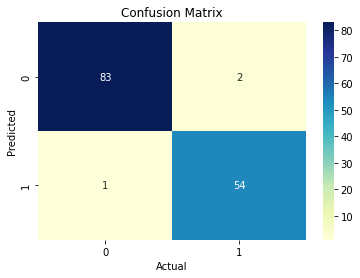

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# 
results=confusion_matrix(y_test,y_pred)
print('Confusion matrix')
print(results)

# Classification Accuracy.
results1=classification_report(y_test,y_pred)
print('Classification report')
print(results1)


results2=accuracy_score(y_test,y_pred)
print('Accuracy score')
print(results2)

svm = sns.heatmap(pd.DataFrame(results), annot=True, cmap='YlGnBu',fmt='d')
plt.title('Confusion Matrix',y=1.1)
plt.xlabel('Actual')
plt.ylabel('Predicted')


#Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
LR_model = LogisticRegression()

LR_model.fit(X_train,y_train.ravel())
y_pred_L = LR_model.predict(X_test)
y_train_pred=LR_model.predict(X_train)

[[82  3]
 [ 1 54]]
0.9714285714285714
              precision    recall  f1-score   support

           0       0.99      0.96      0.98        85
           1       0.95      0.98      0.96        55

    accuracy                           0.97       140
   macro avg       0.97      0.97      0.97       140
weighted avg       0.97      0.97      0.97       140



Text(33.0, 0.5, 'Predicted')

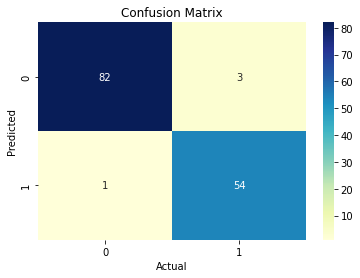

In [ ]:
results10=confusion_matrix(y_test,y_pred_L)
print(results10)

results11=accuracy_score(y_test,y_pred_L)
print(results11)

results12=classification_report(y_test, y_pred_L)
print(results12)

svm = sns.heatmap(pd.DataFrame(results10), annot=True, cmap='YlGnBu',fmt='d')
plt.title('Confusion Matrix',y=1.1)
plt.xlabel('Actual')
plt.ylabel('Predicted')

In [ ]:
'''
#Confusion matrix
print(metrics.classification_report(y_test, y_pred, target_names=['B','M']))
print(metrics.classification_report(y_train, y_train_pred, target_names=['B','M']))
'''

              precision    recall  f1-score   support

           B       0.99      0.96      0.98        85
           M       0.95      0.98      0.96        55

    accuracy                           0.97       140
   macro avg       0.97      0.97      0.97       140
weighted avg       0.97      0.97      0.97       140

              precision    recall  f1-score   support

           B       0.98      0.98      0.98       373
           M       0.95      0.96      0.95       186

    accuracy                           0.97       559
   macro avg       0.97      0.97      0.97       559
weighted avg       0.97      0.97      0.97       559



[[82  3]
 [ 1 54]]


Text(0.5, 15.0, 'Predicted')

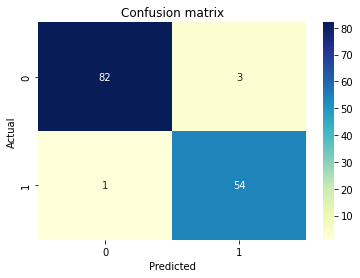

In [ ]:
'''
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')
'''

In [ ]:
#ROc-AUc
from sklearn.metrics import roc_curve
# Logistic Regression model
y_pred_proba = LR_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

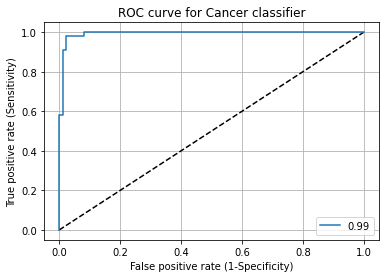

In [ ]:
# Ploting ROC 
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label = "%.2f" %sklearn.metrics.roc_auc_score(y_test,y_pred_proba))
plt.legend(loc = 'lower right')
plt.title('ROC curve for Cancer classifier')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)
plt.show()

In [ ]:
sklearn.metrics.roc_auc_score(y_test,y_pred_proba)
#0.9929

0.9929411764705882

# SVM

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn import preprocessing
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
svm_model = SVC()
parameters=[
            {'C':[1,10,100,1000],
             'kernel':['linear']}
]

In [ ]:
X_train, X_test,y_train,y_test=train_test_split(X, y, test_size=0.2, random_state=20)

In [ ]:
svm_model.fit(X_train, y_train)

SVC()

In [ ]:
y_predict=svm_model.predict(X_test)
y_predict

array([0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1])

[[87  3]
 [ 1 49]]
0.9714285714285714
              precision    recall  f1-score   support

           0       0.99      0.97      0.98        90
           1       0.94      0.98      0.96        50

    accuracy                           0.97       140
   macro avg       0.97      0.97      0.97       140
weighted avg       0.97      0.97      0.97       140



Text(33.0, 0.5, 'Predicted')

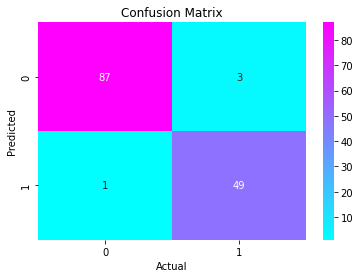

In [ ]:
results3=confusion_matrix(y_test,y_predict)
print(results3)

results4=accuracy_score(y_test,y_predict)
print(results4)

results5=classification_report(y_test, y_predict)
print(results5)

svm = sns.heatmap(pd.DataFrame(results3), annot=True, cmap='cool',fmt='d')
plt.title('Confusion Matrix',y=1.1)
plt.xlabel('Actual')
plt.ylabel('Predicted')

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.652 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.661 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.661 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.661 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.658 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.929 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.938 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.893 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.964 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.946 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.946 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

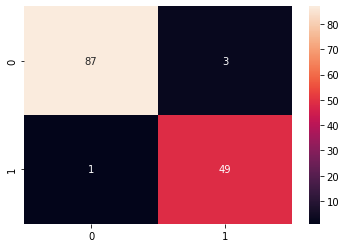

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.01,0.001,0.001], 'kernel':['rbf']}
grid = GridSearchCV(SVC(),param_grid,verbose = 4)
grid.fit(X_train,y_train)
grid.best_params_
grid.best_estimator_
grid_predictions = grid.predict(X_test)
cmG = confusion_matrix(y_test,grid_predictions)
sns.heatmap(cmG, annot=True)
print(classification_report(y_test,grid_predictions))

In [ ]:
grid.best_params_

{'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}

In [ ]:
grid_svm = GridSearchCV(svm_model,parameters, cv=20, scoring='accuracy')
grid_svm.fit(X,y)

GridSearchCV(cv=20, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']}],
             scoring='accuracy')

In [ ]:
print(grid_svm.best_score_)
#Accuracy: 0.96429

0.9642857142857142
